In [2]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def draw_brain(levels):
    
    a = 1
    b = 5.1 / (4 * np.pi**2)
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np.pi)
    
    brainfunction = lambda x1, x2: a*(x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*np.cos(x1) + s
    
    X1, X2 = np.meshgrid(np.linspace(-5., 20., 100), np.linspace(-5.0, 20.0, 100))
    Y = brainfunction(X1, X2)
    
    plt.figure(figsize=(8, 8))
    plt.contour(X1, X2, Y, np.logspace(-5.0, 20.0, levels, base=10))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

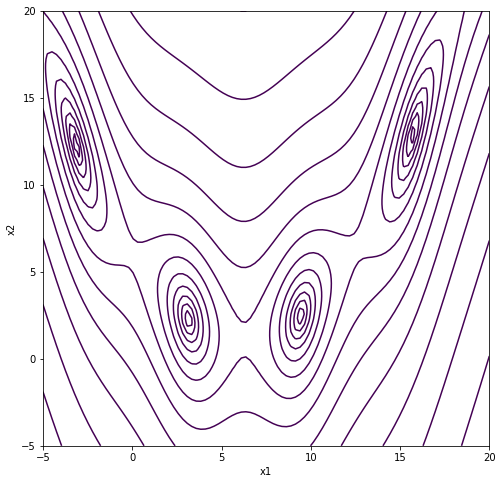

In [5]:
draw_brain(100)

In [6]:
def f(x, a=1, b=5.1/(4*np.pi**2), c=5/np.pi, r=6, s=10, t=1/(8*np.pi)):
    y = a*(x[1] - b*x[0]**2 + c*x[0] - r)**2 + s*(1-t)*sp.cos(x[0]) + s
    return y

In [7]:
x = sp.IndexedBase('x')
gradients = np.array([sp.diff(f(x), x[i]) for i in range(2)])
grads = sp.lambdify(x, gradients, 'numpy')

In [8]:
x_ = np.array([5., 5.])

In [9]:
def momentum(f, grads, x, alpha, beta=0.9, maxiter=1000, TOL=1e-4, verbose=False):
    v = -alpha * np.asarray(grads(x))
    x = x + v
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        v = beta*v - alpha*np.asarray(grads(x))
        x = x + v
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
        
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
            
        y_prev = y
        
        i += 1
    
    return i, y, x

In [10]:
momentum(f, grads, x_, alpha=1e-2, verbose=True)

1: y 21.0899, x [4.66418707 4.78597915]
2: y 15.9427, x [4.34275588 4.59248879]
3: y 10.1274, x [3.93512395 4.35699066]
4: y 5.1521, x [3.4696926 4.0926526]
5: y 2.5180, x [2.99122973 3.81355599]
6: y 2.5889, x [2.55177214 3.53400157]
7: y 4.4026, x [2.19560852 3.26732095]
8: y 6.5765, x [1.95009431 3.02452876]
9: y 8.0795, x [1.82622623 2.81327722]
10: y 8.3905, x [1.82357374 2.63737157]
11: y 7.4126, x [1.93409731 2.49685476]
12: y 5.4296, x [2.14315393 2.3885532 ]
13: y 3.0854, x [2.42850074 2.30695919]
14: y 1.2104, x [2.75950087 2.24532143]
15: y 0.4189, x [3.09929249 2.19677778]
16: y 0.7506, x [3.41092798 2.15531733]
17: y 1.7278, x [3.66469909 2.11638312]
18: y 2.7420, x [3.84236436 2.07706269]
19: y 3.3678, x [3.93693327 2.03597178]
20: y 3.4383, x [3.95003584 1.99299981]
21: y 2.9939, x [3.88936921 1.94904426]
22: y 2.2217, x [3.76730363 1.90578488]
23: y 1.3970, x [3.60036467 1.86548797]
24: y 0.7983, x [3.40864079 1.83079923]
25: y 0.5951, x [3.21423613 1.80448244]
26: y 0.

(105, 0.398353128041478, array([3.13176897, 2.28110843]))

In [11]:
def nesterov(f, grads, x, alpha, beta=0.9, maxiter=1000, TOL=1e-4, verbose=True):
    
    v = -alpha * np.asarray(grads(x))
    x = x + v
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        
        v = beta*v - alpha*np.asarray(grads(x + beta*v))
        x = x + v
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
        
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
        
        y_prev = y
        
        i += 1
        
    return i, y, x

In [12]:
nesterov(f, grads, x_, alpha=1e-2, verbose=True)

1: y 21.0745, x [4.66179083 4.78802685]
2: y 15.9515, x [4.33935191 4.60049443]
3: y 10.3124, x [3.94340796 4.37655362]
4: y 5.5986, x [3.51614588 4.13057145]
5: y 2.8830, x [3.10711754 3.87665971]
6: y 2.1649, x [2.75826095 3.62737457]
7: y 2.6446, x [2.49593897 3.39258982]
8: y 3.4146, x [2.33158061 3.17891933]
9: y 3.8587, x [2.26536779 2.98969555]
10: y 3.7236, x [2.28918142 2.82536504]
11: y 3.0599, x [2.38819334 2.68416327]
12: y 2.1235, x [2.5420763 2.5629412]
13: y 1.2377, x [2.72702963 2.45800429]
14: y 0.6428, x [2.91897258 2.36581863]
15: y 0.4081, x [3.09700521 2.28347879]
16: y 0.4502, x [3.24581281 2.20891633]
17: y 0.6194, x [3.3564386  2.14090603]
18: y 0.7833, x [3.42578815 2.07895433]
19: y 0.8676, x [3.45554207 2.02313811]
20: y 0.8589, x [3.45094374 1.97393099]
21: y 0.7852, x [3.41962481 1.93203192]
22: y 0.6903, x [3.37047009 1.89820071]
23: y 0.6120, x [3.31252161 1.8731058 ]
24: y 0.5686, x [3.25398942 1.85719387]
25: y 0.5581, x [3.20148132 1.85059346]
26: y 0.

(68, 0.397897258856233, array([3.14028217, 2.2747354 ]))

In [13]:
def adagrad(f, grads, x, alpha, epsilon=1e-7, maxiter=1000, TOL=1e-4, verbose=True):
    
    s = np.zeros_like(x)
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        
        # g는 2x1 벡터
        g = np.asarray(grads(x))
        s += (g * g)
        
        x = x - alpha*g / np.sqrt(s + epsilon)
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
        
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
        
        y_prev = y
        
        i += 1
        
    return i, y, x

In [14]:
adagrad(f, grads, x_, alpha=1e-1, verbose=True)

1: y 24.7284, x [4.9 4.9]
2: y 23.3843, x [4.82828222 4.83056759]
3: y 22.2899, x [4.76944146 4.77454713]
4: y 21.3474, x [4.71841356 4.72649416]
5: y 20.5106, x [4.67279357 4.68387113]
6: y 19.7533, x [4.63121527 4.64525503]
7: y 19.0590, x [4.59281381 4.60975395]
8: y 18.4162, x [4.55700013 4.5767654 ]
9: y 17.8167, x [4.52335131 4.54585988]
10: y 17.2546, x [4.49155127 4.51671842]
11: y 16.7250, x [4.46135624 4.48909645]
12: y 16.2242, x [4.43257343 4.46280156]
13: y 15.7492, x [4.40504713 4.43767913]
14: y 15.2973, x [4.37864935 4.41360267]
15: y 14.8665, x [4.35327333 4.39046714]
16: y 14.4551, x [4.32882887 4.36818418]
17: y 14.0613, x [4.3052389 4.3466786]
18: y 13.6840, x [4.28243692 4.32588579]
19: y 13.3220, x [4.26036505 4.30574974]
20: y 12.9741, x [4.23897254 4.28622151]
21: y 12.6395, x [4.21821456 4.26725805]
22: y 12.3174, x [4.19805126 4.24882124]
23: y 12.0069, x [4.17844706 4.23087712]
24: y 11.7076, x [4.15936996 4.21339529]
25: y 11.4186, x [4.14079109 4.19634843]


216: y 0.8793, x [3.11643208 2.98634051]
217: y 0.8747, x [3.11551255 2.98357693]
218: y 0.8702, x [3.11460824 2.98082833]
219: y 0.8657, x [3.11371897 2.97809456]
220: y 0.8613, x [3.11284454 2.97537551]
221: y 0.8570, x [3.11198475 2.97267105]
222: y 0.8527, x [3.11113942 2.96998106]
223: y 0.8485, x [3.11030836 2.96730541]
224: y 0.8444, x [3.10949138 2.96464398]
225: y 0.8403, x [3.1086883  2.96199665]
226: y 0.8362, x [3.10789894 2.9593633 ]
227: y 0.8322, x [3.10712311 2.95674382]
228: y 0.8283, x [3.10636064 2.95413809]
229: y 0.8244, x [3.10561136 2.95154599]
230: y 0.8206, x [3.1048751  2.94896742]
231: y 0.8168, x [3.10415168 2.94640226]
232: y 0.8131, x [3.10344093 2.9438504 ]
233: y 0.8094, x [3.10274269 2.94131173]
234: y 0.8058, x [3.1020568  2.93878614]
235: y 0.8022, x [3.10138309 2.93627354]
236: y 0.7986, x [3.1007214  2.93377381]
237: y 0.7951, x [3.10007157 2.93128684]
238: y 0.7917, x [3.09943346 2.92881254]
239: y 0.7883, x [3.09880689 2.92635081]
240: y 0.7849, x

419: y 0.5053, x [3.08053764 2.62229318]
420: y 0.5046, x [3.08065681 2.62113812]
421: y 0.5039, x [3.0807766  2.61998724]
422: y 0.5032, x [3.08089698 2.6188405 ]
423: y 0.5025, x [3.08101795 2.6176979 ]
424: y 0.5018, x [3.08113948 2.61655941]
425: y 0.5012, x [3.08126157 2.61542501]
426: y 0.5005, x [3.0813842  2.61429469]
427: y 0.4998, x [3.08150736 2.61316842]
428: y 0.4991, x [3.08163103 2.6120462 ]
429: y 0.4985, x [3.0817552  2.61092799]
430: y 0.4978, x [3.08187986 2.60981379]
431: y 0.4972, x [3.082005   2.60870357]
432: y 0.4965, x [3.0821306  2.60759732]
433: y 0.4959, x [3.08225665 2.60649501]
434: y 0.4952, x [3.08238314 2.60539664]
435: y 0.4946, x [3.08251006 2.60430218]
436: y 0.4940, x [3.08263739 2.60321162]
437: y 0.4933, x [3.08276512 2.60212494]
438: y 0.4927, x [3.08289325 2.60104212]
439: y 0.4921, x [3.08302175 2.59996315]
440: y 0.4915, x [3.08315063 2.59888801]
441: y 0.4909, x [3.08327986 2.59781667]
442: y 0.4903, x [3.08340944 2.59674914]
443: y 0.4897, x

641: y 0.4233, x [3.10836687 2.44295027]
642: y 0.4232, x [3.10847021 2.44240658]
643: y 0.4230, x [3.10857328 2.44186468]
644: y 0.4228, x [3.10867607 2.44132455]
645: y 0.4227, x [3.10877859 2.44078619]
646: y 0.4225, x [3.10888083 2.44024959]
647: y 0.4224, x [3.10898279 2.43971474]
648: y 0.4222, x [3.10908447 2.43918164]
649: y 0.4220, x [3.10918588 2.43865029]
650: y 0.4219, x [3.10928702 2.43812067]
651: y 0.4217, x [3.10938787 2.43759278]
652: y 0.4216, x [3.10948845 2.43706662]
653: y 0.4214, x [3.10958876 2.43654217]
654: y 0.4213, x [3.10968879 2.43601944]
655: y 0.4211, x [3.10978855 2.43549842]
656: y 0.4210, x [3.10988803 2.4349791 ]
657: y 0.4208, x [3.10998724 2.43446148]
658: y 0.4207, x [3.11008617 2.43394554]
659: y 0.4205, x [3.11018483 2.43343129]
660: y 0.4204, x [3.11028321 2.43291872]
661: y 0.4202, x [3.11038132 2.43240782]
662: y 0.4201, x [3.11047916 2.43189859]
663: y 0.4200, x [3.11057673 2.43139102]
664: y 0.4198, x [3.11067402 2.43088511]
665: y 0.4197, x

(860, 0.404104049221932, array([3.12503119, 2.35795017]))